# Understanding the data

## Data examples

## Label Distribution                                                                  

## Data Preprocssing

### Balancing data

### Parsing
* Encoding - unicode/ascii
* punctuation removal - code vs text
### Tokenisation
for code - space might not be a good indicator, handling nested blocks
### Vectorisation

## NLP devices for each phase
- libraries - stanford coreNLP,
- language models -> unigram, n-gram, embeddings

## Mapping between NLP devices features and current data distrubtion 
- sparsity
- 

### Justification for choosing based on mapping
- parsing - code and normal
- tokenisation - code and normal
- language model - code and normal
- vectorisation (embedding , tf-idf vectoriser, some modification of count vectoriser) - code and normal
- model

## Analysis
* rank or probability distribution or confidence intervals
* accuracy

In [711]:
#switches 
ENABLE_GRID_SEARCH = False

-----------------------
# DATA DOWNLOAD

In [596]:
from utils import *
import os

In [597]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from pprint import pprint
from collections import *

In [598]:
FILTER_FOR_ABUNDANT = True
FILTER_ABUNDANCE_THRESHOLD = 50 # 10% of most freq
FILTER_OUTLIERS = True

OUTLIER_CNT = 3

In [718]:

DATA_DIR = 'data/'
SUMMARY_PATH = os.path.join(DATA_DIR,'summary_data.txt')
DESCRIPT_PATH = os.path.join(DATA_DIR,'description_data.txt')
LABEL_ID_PATH = os.path.join(DATA_DIR,'label_id.txt')
LABEL_NAME_PATH = os.path.join(DATA_DIR,'label_name.txt')
TIME_CREATED_FILE_PATH = os.path.join(DATA_DIR,'time_created_data.txt')
#ASSIGNEE_FILE_PATH = os.path.join(DATA_DIR,'assignee_data.txt')
#REPORTER_FILE_PATH = os.path.join(DATA_DIR,'reporter_data.txt')
TIME_FORMAT = '%Y-%m-%d' #'%Y-%m-%dT%H:%M:%S.%f-%X'

with open(SUMMARY_PATH,'r') as f:
    summaries = f.read().lower().split('\n')
with open(DESCRIPT_PATH,'r') as f:
    descriptions = f.read().lower().split('\n~~~~~~~~~~\n')
with open(LABEL_ID_PATH,'r') as f:
    component_ids = f.read().split('\n')
    component_ids = [int(i) for i in component_ids]
with open(LABEL_NAME_PATH,'r') as f:
    component_names = f.read().split('\n')
with open(TIME_CREATED_FILE_PATH,'r') as f:
    time_created = f.read().split('\n')
#with open(REPORTER_FILE_PATH,'r') as f:
    #reporters = f.read().split('\n')
summaries = summaries[:-4]
descriptions = descriptions[:-4]
component_ids = component_ids[:-4]
component_names = component_names[:-4]
time_created = time_created[:-4]
#reporters = reporters[:-4]
assert len(summaries)==len(descriptions)
assert len(descriptions)== len(component_ids)
assert len(component_ids)==len(component_names)
assert len(component_names)== len(time_created)
#assert len(time_created) == len(reporters)
downloaded_issues = len(summaries)-5
print('total downloaded issues %d'%downloaded_issues)
print(summaries[-5:])

total downloaded issues 7540
['make load analysis timezone agnostic', 'serialization / data processing throughput for v1.0 of revpro', 'remote invocation', 'make kmean a function', 'display timezone offset and allow user to edit offset in timeseries editor']


In [723]:
uniq_component_ids = list(set(component_ids))
sum_desc = [summaries[i]+" "+descriptions[i] for i in range(len(summaries))]
time_created_ts = [timestamp(t.split('T')[0],TIME_FORMAT) for t in time_created]
id2name = dict(zip(component_ids,component_names))
uniq_component_ids = list(id2name.keys())
uniq_component_names = list(id2name.values())

issueType = namedtuple('issueType',['summary','description','component_id','component_name','time_created','sum_desc'])
downloaded_dataset = [issueType(summary=summaries[i],description=descriptions[i],component_id=component_ids[i],component_name=component_names[i],time_created=time_created_ts[i],sum_desc=sum_desc[i]) for i in range(downloaded_issues)]#list(zip(summaries,descriptions,component_ids,component_names,sum_desc))
#print(id2name)
#print(uniq_component_ids)
#print(uniq_component_names)

for d in downloaded_dataset[:20]:
    print(d.summary)
    print('----------------')
    print(d.description)
    print('----------------')
    print(d.sum_desc)
    print('----------------')

singleton.make should return cached instance
----------------

----------------
singleton.make should return cached instance 
----------------
single sign on (sso) set up documentation
----------------
this wiki page should be edited for content and turned into a c3doc in depth article.

https://c3energy.atlassian.net/wiki/spaces/sam/pages/742850704/single+sign+on+sso+configuration
----------------
single sign on (sso) set up documentation this wiki page should be edited for content and turned into a c3doc in depth article.

https://c3energy.atlassian.net/wiki/spaces/sam/pages/742850704/single+sign+on+sso+configuration
----------------
workflow type documentation
----------------
examples of how workflows are implemented, using the related types would be helpful for new developers attempting to use this feature.

currently, there is a decent in depth article, (/api/1/3m/prod/documentation/topic/workflow), but some concrete example would go a long way.
----------------
workflow type doc

In [658]:
for i,id_ in enumerate(component_ids):
    if id_ == 11986:
        print(component_names[i])
        break
downloaded_dataset[0]

Server


issueType(summary='singleton.make should return cached instance', description='', component_id=11987, component_name='Type System', time_created=1529391600.0, sum_desc='singleton.make should return cached instance ')

In [659]:
#from pprint import pprint
#print(descriptions[:5])

-------------------

# DATA INTROSPECTION/ EXPLORATORY ANALYSIS:

### 1. Number of missing components:

### 2. Number of unique components:

In [660]:
print(len(uniq_component_ids))
print(set(component_names))

64
{'Management', 'Perf Metric', 'SAML', 'AdminGroups', 'c3cli', 'MapReduce', 'Expression Engine', 'CLI', 'Invalidation Queues', 'Timeseries', 'normalization', 'Cluster Manager', 'AWS', 'Security', 'Action Engine', 'Cache', 'Metadata Store', 'PSR', 'Weather', 'Impoersonation', 'PageGroup Permissions', 'Documentation', 'Code Gen', 'SSO', 'Data Science Server', 'Analytics Container Engine', 'Cron', 'JavaScript Type-System - OLD', 'Console', 'opsagent', 'PythonActionEngine', 'Eclipse Plugin', 'ospagent', 'Azure', 'UI', 'File System', 'Server', 'Config', 'Data Integrator', 'syncAll on parquet file fails on loading, unable to continue', 'c3-prov', 'Needs to be categorized', 'Jarvis', 'Jenkins', 'Stored Calcs', 'Type System', 'DB Engine', 'Metadata', 'chef', 'Data Model', 'TurboJS', 'REST Api', 'Provisioner', 'S3', 'JavaScript Type-System', 'Deployment', 'ETL', 'Cassandra', 'Cater', 'Analytics Container', 'Unit', 'zookeeper', 'Metrics Engine', 'C3 Dashboard'}


### 2. Number of missing descriptions and corresponding labels

Total number of issues with empty descriptions 2779


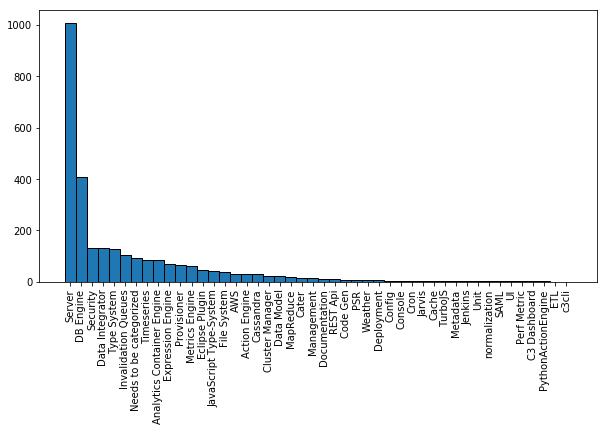

In [661]:
missing_description__categories = [d.component_name for d in downloaded_dataset if d.description== '' ]
print("Total number of issues with empty descriptions {}".format(len(missing_description__categories)))
plot_distribution(missing_description__categories,plt_size=(10,5))

3. Few unique components and their summaries (30% of the components)

### 4. Time distribution for each category

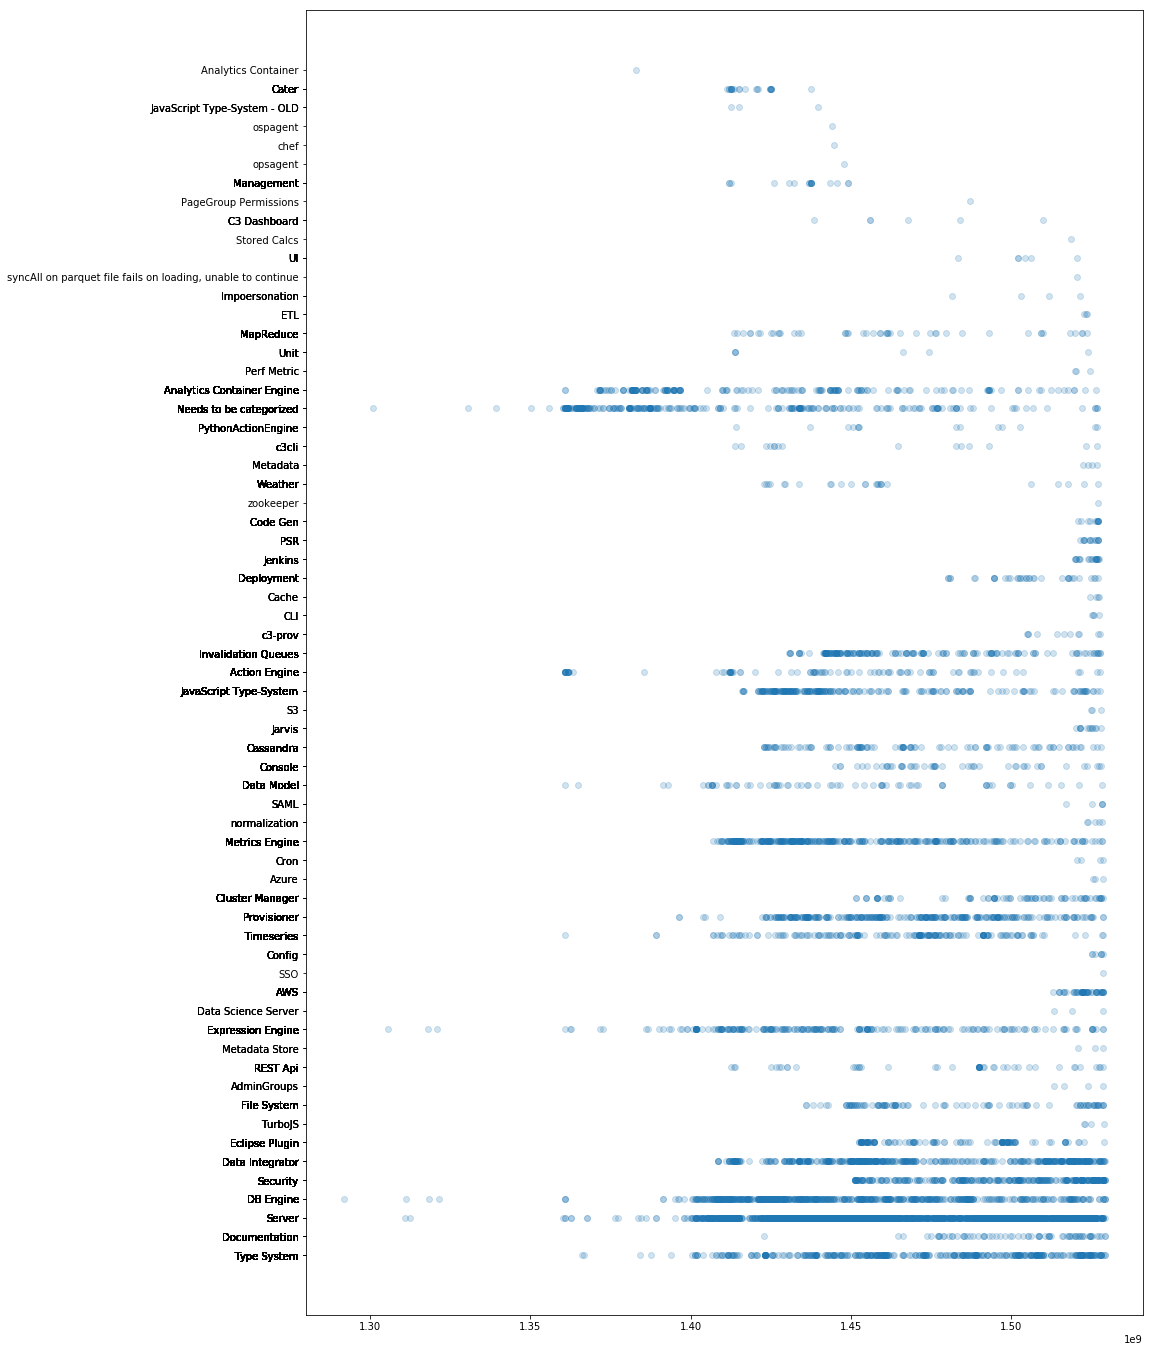

In [662]:
import matplotlib.pyplot as plt

component_indexing = dict(zip(uniq_component_names,range(len(uniq_component_names))))
y = [component_indexing[c] for c in component_names]
x = [time_created_ts]

#len(component_ids)
plt.scatter(x,y,alpha=0.2)
#print(y,uniq_components)
plt.yticks(y,component_names)

'''plt.gca().margins(y=0)
plt.gcf().canvas.draw()
tl = plt.gca().get_yticklabels()
maxsize = max([t.get_window_extent().width for t in tl])
m = 0.2 # inch margin
s = maxsize/plt.gcf().dpi*len(y)+2*m
margin = m/plt.gcf().get_size_inches()[0]'''

#plt.gcf().subplots_adjust(left=margin, right=1.-margin)
plt.gcf().set_size_inches( 15,24)
plt.show()

#TODO : Line indicating cut-off

In [663]:
ts_now = time.time()
months_cap = 6 

recent_issues__component_names = [component_names[i] for i in range(len(component_names)) if ts_now - time_created_ts[i]  < 60*60*24*30*months_cap]
print('{} Unique components in past {} months: '.format(len(set(recent_issues__component_names)),months_cap))
recent_components =  set(recent_issues__component_names)
pprint(Counter(recent_issues__component_names).most_common())

print('Older components:')
print(set(uniq_component_names) - recent_components)
#print('{} {}'.format(len(recent_components),len(component_names)))

55 Unique components in past 6 months: 
[('Server', 321),
 ('Security', 114),
 ('Data Integrator', 114),
 ('Type System', 76),
 ('AWS', 54),
 ('DB Engine', 40),
 ('Documentation', 27),
 ('File System', 25),
 ('Cluster Manager', 24),
 ('Provisioner', 22),
 ('Jenkins', 21),
 ('Metrics Engine', 19),
 ('JavaScript Type-System', 19),
 ('Invalidation Queues', 16),
 ('Expression Engine', 15),
 ('PSR', 15),
 ('Jarvis', 13),
 ('Deployment', 12),
 ('Code Gen', 12),
 ('Cassandra', 11),
 ('Eclipse Plugin', 10),
 ('REST Api', 8),
 ('Config', 7),
 ('c3-prov', 7),
 ('Analytics Container Engine', 7),
 ('Console', 6),
 ('normalization', 5),
 ('SAML', 5),
 ('Needs to be categorized', 5),
 ('MapReduce', 5),
 ('TurboJS', 4),
 ('Timeseries', 4),
 ('Cron', 4),
 ('Action Engine', 4),
 ('CLI', 4),
 ('Cache', 4),
 ('Weather', 4),
 ('Metadata', 4),
 ('AdminGroups', 3),
 ('Metadata Store', 3),
 ('Azure', 3),
 ('Data Model', 3),
 ('S3', 3),
 ('Perf Metric', 3),
 ('ETL', 3),
 ('Data Science Server', 2),
 ('c3cli',


### 5. Categorical distribution
1. Pre data prepocessing : Classes and frequency distribution
2. Post data prepocessing :Number of english tokesn vs non-english tokens (code components)

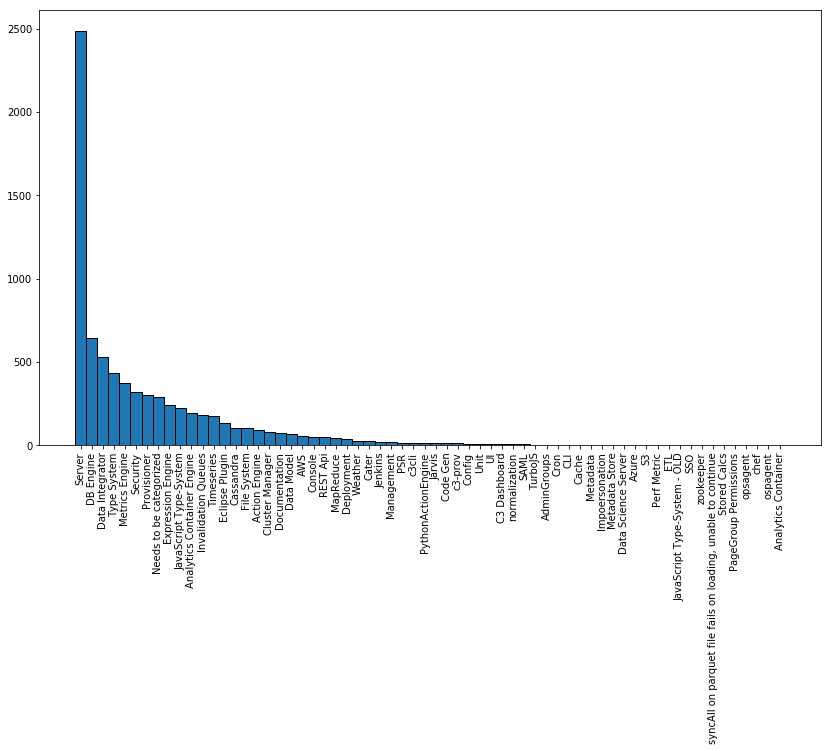

In [664]:
%matplotlib inline

from collections import Counter
label_count = Counter(component_names).most_common()

import matplotlib.pyplot as plt
label_indices = range(len(label_count))
label_names = [x[0] for x in label_count]
label_freqs = [x[1] for x in label_count]
plt.bar(label_indices,label_freqs,width=1,align='center',edgecolor='black')
plt.xticks(label_indices,label_names,rotation='vertical')
plt.gcf().set_size_inches(14, 8)
plt.show()

In [665]:
pprint(label_count)

[('Server', 2486),
 ('DB Engine', 645),
 ('Data Integrator', 529),
 ('Type System', 435),
 ('Metrics Engine', 376),
 ('Security', 317),
 ('Provisioner', 301),
 ('Needs to be categorized', 287),
 ('Expression Engine', 243),
 ('JavaScript Type-System', 224),
 ('Analytics Container Engine', 192),
 ('Invalidation Queues', 182),
 ('Timeseries', 178),
 ('Eclipse Plugin', 131),
 ('Cassandra', 104),
 ('File System', 103),
 ('Action Engine', 92),
 ('Cluster Manager', 80),
 ('Documentation', 74),
 ('Data Model', 69),
 ('AWS', 55),
 ('Console', 50),
 ('REST Api', 48),
 ('MapReduce', 46),
 ('Deployment', 37),
 ('Weather', 25),
 ('Cater', 24),
 ('Jenkins', 21),
 ('Management', 18),
 ('PSR', 15),
 ('c3cli', 15),
 ('PythonActionEngine', 14),
 ('Jarvis', 13),
 ('Code Gen', 12),
 ('c3-prov', 11),
 ('Config', 7),
 ('Unit', 6),
 ('UI', 6),
 ('C3 Dashboard', 6),
 ('normalization', 5),
 ('SAML', 5),
 ('TurboJS', 4),
 ('AdminGroups', 4),
 ('Cron', 4),
 ('CLI', 4),
 ('Cache', 4),
 ('Metadata', 4),
 ('Impoers

------
## Data filtering
1. Remove archaic categories (categories with the most recent ticket filed more than 'x' months)
2. Remove 'Needs to be categorised'
3. Remove tickets missing a description **???**

In [666]:
months_cap_filter = 12
dataset = downloaded_dataset

dataset = [d for d in dataset if not d.description=='' ]
component_categories = [d.component_id for d in dataset ]
print("After EMPTY DESCRIPTION filter - training size : %d\n No of labels: %d\n"% (len(dataset),len(set(component_categories))))

dataset = [d for d in dataset if not d.component_name.lower().strip()=='needs to be categorized' ]
component_categories = [d.component_id for d in dataset ]
print("After NTBC filter - training size : %d\n No of labels: %d\n"% (len(dataset),len(set(component_categories))))

ts_now = time.time()
dataset = [d for d in dataset if ts_now - d.time_created  < 60*60*24*30*months_cap_filter]
component_categories = [d.component_id for d in dataset ]
print("After Time filter - training size : %d\n No of labels: %d\n"% (len(dataset),len(set(component_categories))))

component_categories = [d.component_id for d in dataset ]

FILTER_FOR_ABUNDANT = True
FILTER_ABUNDANCE_THRESHOLD = 10
if FILTER_FOR_ABUNDANT:
    c = dict(Counter(component_categories).most_common())
    
    dataset = [d for d in dataset if c[d.component_id]>=FILTER_ABUNDANCE_THRESHOLD]
    component_categories = [d.component_id for d in dataset ]
    print("after filter - training size : %d \n No of labels: %d" % (len(dataset),len(set(component_categories))))

#classes = sorted(list(set(component_categories)))
classes_sorted_by_frq = [cls for cls,_ in Counter(component_categories).most_common()]
#Counter(component_categories).most_common()#classes_sorted_by_frq

After EMPTY DESCRIPTION filter - training size : 4766
 No of labels: 62

After NTBC filter - training size : 4571
 No of labels: 61

After Time filter - training size : 1397
 No of labels: 52

after filter - training size : 1298 
 No of labels: 22


In [667]:
#extreme_classes = []
#most_frq_classes =[cl for cl,_ in Counter(y_test).most_common(8)]
#least_frq_classes =[cl for cl,_ in Counter(y_test).most_common()[-8:]]
#extreme_classes = most_frq_classes + least_frq_classes

## Input

In [668]:
data = [d.sum_desc for d in dataset]#sum_desc
labels = [d.component_id for d in dataset]

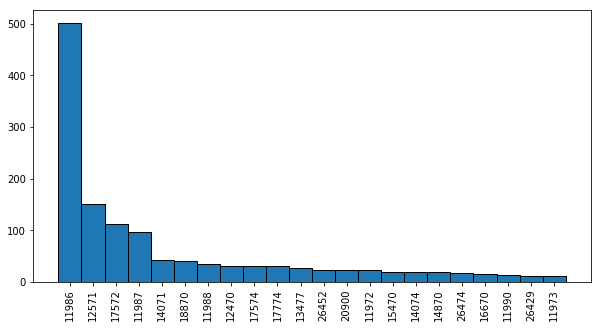

In [669]:
%matplotlib inline

plot_distribution(labels,plt_size=(10,5))

In [670]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import SGDClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

----
## WITHOUT BALANCING

In [671]:
X_train, X_test, y_train, y_test = train_test_split( data, labels, test_size=0.25,stratify=labels)

In [672]:
from sklearn.model_selection import GridSearchCV

sgd_pipe_params = {
    'tfidf__max_df':(0.5,0.6,0.7, 0.75, 0.8,0.85, 1.0),
    'tfidf__min_df':(3,4,5),
    'tfidf__ngram_range': ((1, 1), (1, 2)),
    'clf__class_weight':('balanced',None)
}




#SVM
sgd_estimator_pipeline = Pipeline([
                          ('tfidf', TfidfVectorizer(max_df=0.7,min_df=3,stop_words='english')),
                            ('debug',Debug()),
                          ('clf', SGDClassifier(loss='hinge', penalty='l2',
                                                alpha=1e-3, random_state=0,learning_rate='optimal',
                                                max_iter=100, tol=1e-4))
                        ])
sgd_estimator_pipeline.fit(X_train, y_train)

#Logisitic Regression
lr_estimator_pipeline = Pipeline([
                          ('tfidf', TfidfVectorizer(max_df=0.85,min_df=2,stop_words='english')),
                          ('clf', SGDClassifier(loss='log', penalty='l2',
                                                alpha=1e-3, random_state=0,
                                                max_iter=100, tol=1e-4))
                        ])
lr_estimator_pipeline.fit(X_train, y_train)

# Naive Bayes
nb_estimator_pipeline = Pipeline([
                          ('tfidf', TfidfVectorizer()),
                          ('clf', MultinomialNB())
                        ])
p = nb_estimator_pipeline.fit(X_train, y_train)

In [673]:
sgd_pred1 = sgd_estimator_pipeline.predict(X_test)
lr_pred = lr_estimator_pipeline.predict(X_test)
nb_pred = nb_estimator_pipeline.predict(X_test)

print("SGD Score %f" %sgd_estimator_pipeline.score(X_test,y_test))
print("LR Score %f" %lr_estimator_pipeline.score(X_test,y_test))
print("Naive Bayes Score %f" %nb_estimator_pipeline.score(X_test,y_test))

SGD Score 0.553846
LR Score 0.498462
Naive Bayes Score 0.390769


In [674]:
#print("Number of stop words: %d" % len(sgd_estimator_pipeline.named_steps['tfidf'].stop_words_))
print("Vocabulary size: %d" % len(sgd_estimator_pipeline.named_steps['tfidf'].vocabulary_))

Vocabulary size: 2374


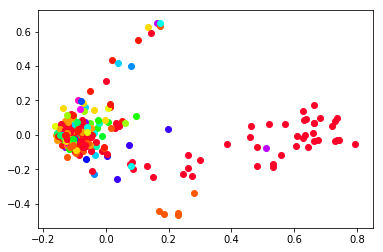

In [675]:
X = sgd_estimator_pipeline.named_steps['debug'].data.todense()
plot_tfidf(X,y_test,classes_sorted_by_frq)

In [676]:
#sgd_estimator_pipeline.named_steps['tfidf'].stop_words_

In [678]:
sorted(sgd_estimator_pipeline.named_steps['tfidf'].vocabulary_)[-100:]

['useradmin',
 'username',
 'users',
 'uses',
 'using',
 'usr',
 'usually',
 'utc',
 'utf',
 'util',
 'utility',
 'v1',
 'v2',
 'v20140225',
 'v3',
 'v7',
 'valid',
 'validate',
 'validated',
 'validation',
 'validationerrors',
 'value',
 'valuereader',
 'values',
 'valuetype',
 'valuetypetest',
 'vanity',
 'vanityurl',
 'var',
 'variable',
 'variables',
 'various',
 'vault',
 've',
 'verified',
 'verify',
 'version',
 'versions',
 'view',
 'visibility',
 'visible',
 'visitnameorkeywordnode',
 'visitnode',
 'volume',
 'vpc',
 'vpcs',
 'vs',
 'wait',
 'waiting',
 'walk',
 'want',
 'wants',
 'warn',
 'warning',
 'warnings',
 'way',
 'web',
 'week',
 'weird',
 'went',
 'west',
 'wiki',
 'wildcards',
 'window',
 'windows',
 'withtargettenant',
 'wizard',
 'won',
 'words',
 'work',
 'workaround',
 'worker',
 'workers',
 'workflow',
 'working',
 'works',
 'workspace',
 'wrap',
 'wrapit',
 'wrapped',
 'write',
 'writestring',
 'writing',
 'written',
 'wrong',
 'wrote',
 'www',
 'x86_64',
 'xm

In [679]:
accuracy_score(y_test,sgd_pred1)

0.5538461538461539

Confusion matrix, without normalization


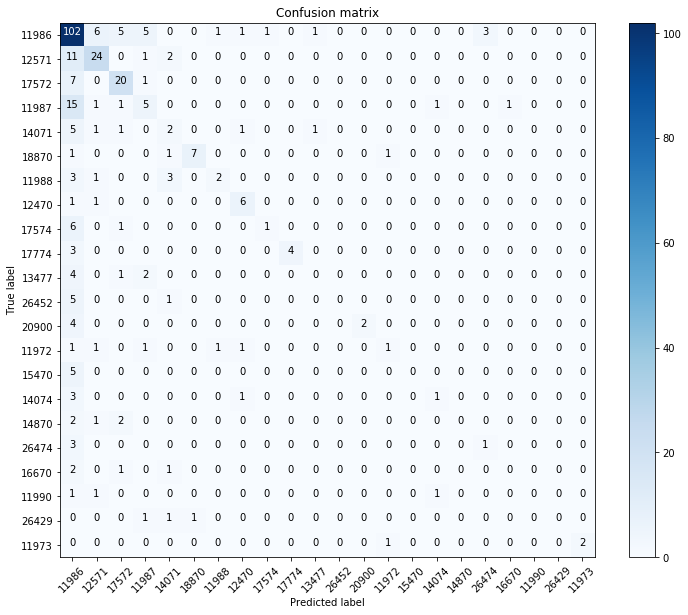

In [680]:
cnf_mat = confusion_matrix(y_test,sgd_pred1,labels=classes_sorted_by_frq)
plot_confusion_matrix(cnf_mat,classes_sorted_by_frq)

In [681]:
accuracy_per_class = np.sum(cnf_mat*np.eye(cnf_mat.shape[0]),axis=1)/np.sum(cnf_mat,axis=1)*100
no_test_inst_per_class = np.sum(cnf_mat,axis=1)
for i in range(len(accuracy_per_class)):
    print("{} [{}] \t\t{}".format(id2name[classes_sorted_by_frq[i]],no_test_inst_per_class[i],accuracy_per_class[i]))

Server [125] 		81.6
Data Integrator [38] 		63.1578947368421
Security [28] 		71.42857142857143
Type System [24] 		20.833333333333336
Provisioner [11] 		18.181818181818183
Documentation [10] 		70.0
DB Engine [9] 		22.22222222222222
Metrics Engine [8] 		75.0
Cluster Manager [8] 		12.5
Eclipse Plugin [7] 		57.14285714285714
JavaScript Type-System [7] 		0.0
AWS [6] 		0.0
Deployment [6] 		33.33333333333333
Expression Engine [6] 		16.666666666666664
File System [5] 		0.0
Cassandra [5] 		20.0
Invalidation Queues [5] 		0.0
Jenkins [4] 		25.0
Console [4] 		0.0
Timeseries [3] 		0.0
c3-prov [3] 		0.0
Analytics Container Engine [3] 		66.66666666666666


In [682]:
grid_search = GridSearchCV(sgd_estimator_pipeline, sgd_pipe_params, n_jobs=-1, verbose=1)
grid_search.fit(data, labels)
print("Best score: %0.3f" % grid_search.best_score_)


Fitting 3 folds for each of 84 candidates, totalling 252 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   12.4s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   44.0s
[Parallel(n_jobs=-1)]: Done 252 out of 252 | elapsed:   58.3s finished


Best score: 0.521


In [683]:
#test_stats(y_test,sgd_pred1,classes_sorted_by_frq,id2name)

In [684]:
t= '''for i in range(len(pred_y_test)):
    if y_test[i]!=pred_y_test[i]:
        
        print(i,' ',y_test[i],' ',pred_y_test[i])'''

------

# DOWNSAMPLE MAJORITY

## Input
Filter  or combine sparse classes **\[TBD\]**

In [685]:
t='''if FILTER_FOR_ABUNDANT:
    print("before filter - training size : %d \n No of labels: %d"% (len(data),len(set(labels))))
    c = dict(Counter(labels).most_common())#dict(Counter(labels).most_common())

    # 12070 is with the label 'Needs to be categorized'
    data = [data[i] for i in range(len(labels)) if c[labels[i]]>FILTER_ABUNDANCE_THRESHOLD]
    labels = [labels[i] for i in range(len(labels)) if c[labels[i]]>FILTER_ABUNDANCE_THRESHOLD]
plot_distribution(labels)'''

## Downsampling

In [686]:
data_minus_majority = [data[i] for i in range(len(labels)) if labels[i]!=11986]
majority_data = [data[i] for i in range(len(labels)) if labels[i]==11986]

labels_minus_majority = [labels[i] for i in range(len(labels)) if labels[i]!=11986]

from sklearn.utils import resample
resampled_majority_data = resample(majority_data,n_samples=800,random_state=0)
downsampled_data = data_minus_majority + resampled_majority_data
downsampled_labels= labels_minus_majority + [11986]*len(resampled_majority_data)

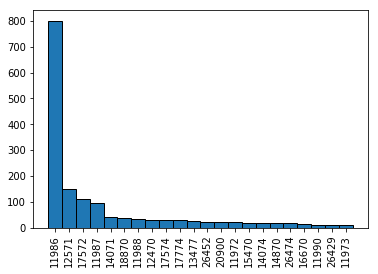

In [687]:
plot_distribution(downsampled_labels)

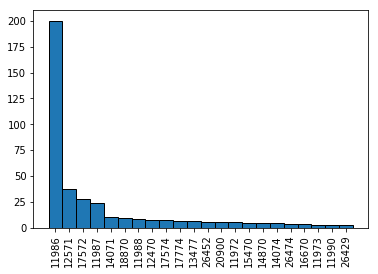

In [688]:
X_train, X_test, y_train, y_test = train_test_split( downsampled_data, downsampled_labels, test_size=0.25,stratify=downsampled_labels)
plot_distribution(y_test)

In [689]:
#SVM
sgd_estimator_pipeline = Pipeline([
                          ('tfidf', TfidfVectorizer(max_df=0.85,min_df=3,stop_words='english')),
                          ('clf', SGDClassifier(loss='hinge', penalty='l2',
                                                alpha=1e-3, random_state=0,
                                                max_iter=100, tol=1e-4))
                        ])
t = sgd_estimator_pipeline.fit(X_train, y_train)

In [690]:
sgd_pred = sgd_estimator_pipeline.predict(X_test)

print("SGD Score %f" %sgd_estimator_pipeline.score(X_test,y_test))


SGD Score 0.657500


Confusion matrix, without normalization


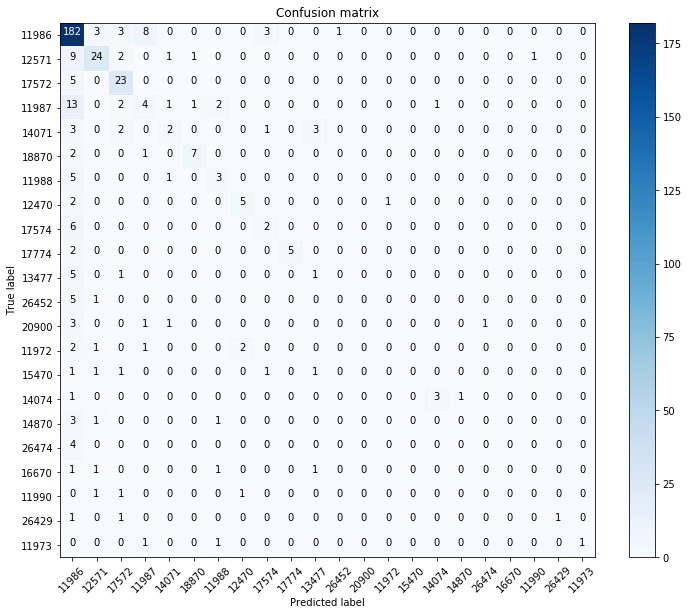

In [691]:
cnf_mat = confusion_matrix(y_test,sgd_pred,labels=classes_sorted_by_frq)
plot_confusion_matrix(cnf_mat,classes_sorted_by_frq,plt_size=(10,10))

In [692]:
accuracy_per_class = np.sum(cnf_mat*np.eye(cnf_mat.shape[0]),axis=1)/np.sum(cnf_mat,axis=1)*100
no_test_inst_per_class = np.sum(cnf_mat,axis=1)
for i in range(len(accuracy_per_class)):
    print("{} [{}] \t\t{}".format(id2name[classes_sorted_by_frq[i]],no_test_inst_per_class[i],accuracy_per_class[i]))

Server [200] 		91.0
Data Integrator [38] 		63.1578947368421
Security [28] 		82.14285714285714
Type System [24] 		16.666666666666664
Provisioner [11] 		18.181818181818183
Documentation [10] 		70.0
DB Engine [9] 		33.33333333333333
Metrics Engine [8] 		62.5
Cluster Manager [8] 		25.0
Eclipse Plugin [7] 		71.42857142857143
JavaScript Type-System [7] 		14.285714285714285
AWS [6] 		0.0
Deployment [6] 		0.0
Expression Engine [6] 		0.0
File System [5] 		0.0
Cassandra [5] 		60.0
Invalidation Queues [5] 		0.0
Jenkins [4] 		0.0
Console [4] 		0.0
Timeseries [3] 		0.0
c3-prov [3] 		33.33333333333333
Analytics Container Engine [3] 		33.33333333333333


In [693]:
#for i,id_ in enumerate(component_ids):
    #if id_ == 11986:
        #print(component_names[i])
        #break

---------

## Uniform Sampling

In [694]:
category_buckets = {}
l = set(labels)
for i in range(len(data)):
    if labels[i] not in category_buckets:
        category_buckets[labels[i]]=[]
    category_buckets[labels[i]] += [data[i]]

SAMPLE_CAP = 100
balanced_data = []
balanced_labels = []
for label, sample in category_buckets.items():
    balanced_data += resample(sample,n_samples=SAMPLE_CAP,random_state=0)
    balanced_labels += [label] * SAMPLE_CAP

In [695]:
X_train, X_test, y_train, y_test = train_test_split( balanced_data, balanced_labels, test_size=0.25,stratify=balanced_labels)

In [696]:
#SVM
sgd_estimator_pipeline = Pipeline([
                          ('tfidf', TfidfVectorizer(max_df=0.85,min_df=3,stop_words='english')),
                          ('clf', SGDClassifier(loss='hinge', penalty='l2',
                                                alpha=1e-3, random_state=0,
                                                max_iter=100, tol=1e-4))
                        ])
t = sgd_estimator_pipeline.fit(X_train, y_train)

SGD Score 0.905455
Confusion matrix, without normalization
Server [25] 		40.0
Data Integrator [25] 		68.0
Security [25] 		92.0
Type System [25] 		40.0
Provisioner [25] 		88.0
Documentation [25] 		96.0
DB Engine [25] 		96.0
Metrics Engine [25] 		92.0
Cluster Manager [25] 		100.0
Eclipse Plugin [25] 		100.0
JavaScript Type-System [25] 		96.0
AWS [25] 		100.0
Deployment [25] 		96.0
Expression Engine [25] 		88.0
File System [25] 		100.0
Cassandra [25] 		100.0
Invalidation Queues [25] 		100.0
Jenkins [25] 		100.0
Console [25] 		100.0
Timeseries [25] 		100.0
c3-prov [25] 		100.0
Analytics Container Engine [25] 		100.0


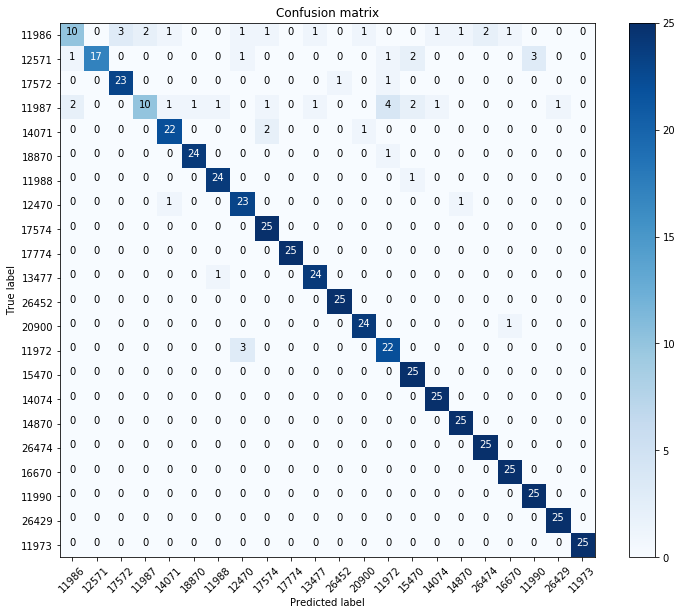

In [697]:
sgd_pred = sgd_estimator_pipeline.predict(X_test)

print("SGD Score %f" %sgd_estimator_pipeline.score(X_test,y_test))
cnf_mat = confusion_matrix(y_test,sgd_pred,labels=classes_sorted_by_frq)

plot_confusion_matrix(cnf_mat,classes_sorted_by_frq)

accuracy_per_class = np.sum(cnf_mat*np.eye(cnf_mat.shape[0]),axis=1)/np.sum(cnf_mat,axis=1)*100
no_test_inst_per_class = np.sum(cnf_mat,axis=1)
t = np.sum(cnf_mat*np.eye(cnf_mat.shape[0]),axis=1)
for i in range(len(accuracy_per_class)):
    print("{} [{}] \t\t{}".format(id2name[classes_sorted_by_frq[i]],no_test_inst_per_class[i],accuracy_per_class[i]))
#print(np.sum(cnf_mat,axis=1))
#for i in range

----
## SMOTE
For uniform sampling we see an accuracy of 100% most likely because oversampling merely replicates the minority and so the train and test may have many duplicayte instances

-----------

## SVC

In [698]:
X_train, X_test, y_train, y_test = train_test_split( data, labels, test_size=0.25,stratify=labels)

In [699]:
from sklearn.svm import SVC

tfidf_vectorizer = TfidfVectorizer(max_df=0.8,min_df=2,stop_words='english') 
X = tfidf_vectorizer.fit_transform(X_train)
clf = SVC(C=10000,class_weight='balanced')

clf.fit(X,y_train)

SVC(C=10000, cache_size=200, class_weight='balanced', coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [700]:
ip = tfidf_vectorizer.transform(X_test)
op = clf.predict(ip)
accuracy_score(y_test,op)

0.5692307692307692

Confusion matrix, without normalization


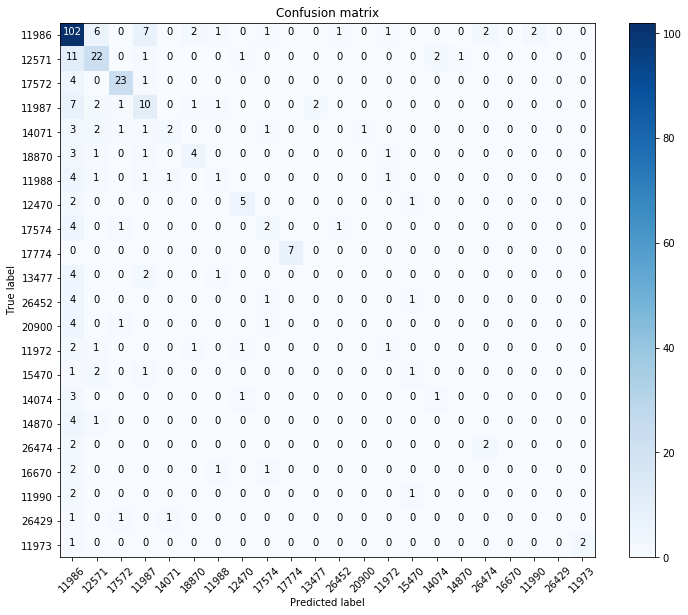

In [701]:
cnf_mat = confusion_matrix(y_test,op,labels=classes_sorted_by_frq)

plot_confusion_matrix(cnf_mat,classes_sorted_by_frq)

In [702]:
import numpy as np
np.unique(op)
#list(zip(op.tolist(),y_test))

array([11972, 11973, 11986, 11987, 11988, 11990, 12470, 12571, 13477,
       14071, 14074, 14870, 15470, 17572, 17574, 17774, 18870, 20900,
       26452, 26474])

------------
## KNN

In [703]:
X_train, X_test, y_train, y_test = train_test_split( data, labels, test_size=0.25)

In [704]:
from sklearn.neighbors import KNeighborsClassifier
knn_pipeline = Pipeline([
                          ('tfidf', TfidfVectorizer(max_df=0.85,min_df=3,stop_words='english')),
                          ('clf', KNeighborsClassifier())
                        ])
knn_pipeline.fit(X_train, y_train)

Pipeline(memory=None,
     steps=[('tfidf', TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=0.85, max_features=None, min_df=3,
        ngram_range=(1, 1), norm='l2', preprocessor=None, smooth_idf=True,
...owski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'))])

In [705]:
knn_pred = knn_pipeline.predict(X_test)
accuracy_score(y_test,knn_pred)

0.5353846153846153

---
## CART

In [706]:
X_train, X_test, y_train, y_test = train_test_split( data, labels, test_size=0.25,stratify= labels)
print("No of training instances: %d \n No of test instances: %d" %(len(X_train),len(X_test)))

No of training instances: 973 
 No of test instances: 325


In [707]:
from sklearn.tree import DecisionTreeClassifier
cart_pipeline = Pipeline([
                          ('tfidf', TfidfVectorizer(max_df=0.9,min_df=3,stop_words='english')),
                          ('clf', DecisionTreeClassifier(random_state=0))
                        ])
cart_pipeline.fit(X_train, y_train)

Pipeline(memory=None,
     steps=[('tfidf', TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=0.9, max_features=None, min_df=3,
        ngram_range=(1, 1), norm='l2', preprocessor=None, smooth_idf=True,
 ...         min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best'))])

In [708]:
cart_pred = cart_pipeline.predict(X_test)
print(cart_pipeline.classes_)
cart_pred_probab = cart_pipeline.predict_proba(X_test)
t = dict([(label,i) for i,label in enumerate(cart_pipeline.classes_)])
#print(t)
#for r in cart_pred_probab:
    #print(r)
accuracy_score(y_test,cart_pred)

[11972 11973 11986 11987 11988 11990 12470 12571 13477 14071 14074 14870
 15470 16670 17572 17574 17774 18870 20900 26429 26452 26474]


0.4338461538461538

Confusion matrix, without normalization
Server 11986 [125] 		66.4
Data Integrator 12571 [38] 		36.84210526315789
Security 17572 [28] 		64.28571428571429
Type System 11987 [24] 		8.333333333333332
Provisioner 14071 [11] 		27.27272727272727
Documentation 18870 [10] 		70.0
DB Engine 11988 [9] 		0.0
Metrics Engine 12470 [8] 		50.0
Cluster Manager 17574 [8] 		25.0
Eclipse Plugin 17774 [7] 		57.14285714285714
JavaScript Type-System 13477 [7] 		14.285714285714285
AWS 26452 [6] 		16.666666666666664
Deployment 20900 [6] 		0.0
Expression Engine 11972 [6] 		33.33333333333333
File System 15470 [5] 		0.0
Cassandra 14074 [5] 		0.0
Invalidation Queues 14870 [5] 		0.0
Jenkins 26474 [4] 		0.0
Console 16670 [4] 		0.0
Timeseries 11990 [3] 		0.0
c3-prov 26429 [3] 		0.0
Analytics Container Engine 11973 [3] 		0.0


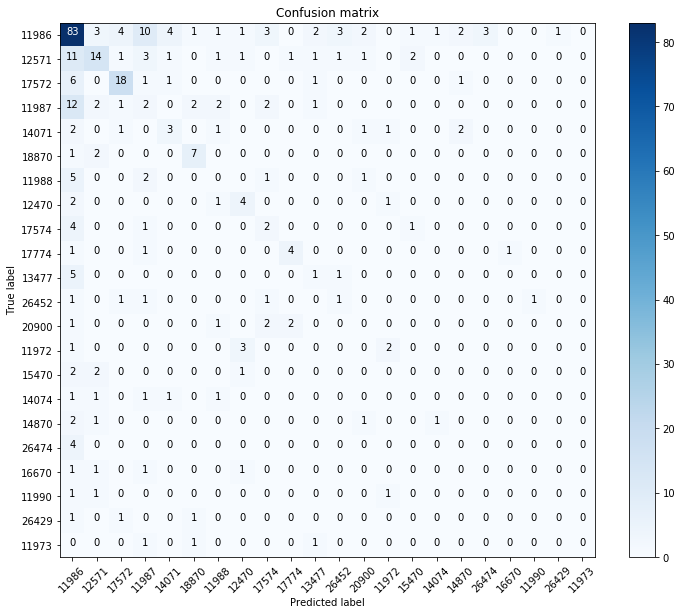

In [709]:
cnf_mat = confusion_matrix(y_test,cart_pred,labels=classes_sorted_by_frq)

plot_confusion_matrix(cnf_mat,classes_sorted_by_frq)

accuracy_per_class = np.sum(cnf_mat*np.eye(cnf_mat.shape[0]),axis=1)/np.sum(cnf_mat,axis=1)*100
no_test_inst_per_class = np.sum(cnf_mat,axis=1)
t = np.sum(cnf_mat*np.eye(cnf_mat.shape[0]),axis=1)
for i in range(len(accuracy_per_class)):
    print("{} {} [{}] \t\t{}".format(id2name[classes_sorted_by_frq[i]],classes_sorted_by_frq[i],no_test_inst_per_class[i],accuracy_per_class[i]))

In [710]:
low_freq_X_test = [X_test[i] for i in range(len(y_test)) if y_test[i] in classes_sorted_by_frq[-10:]]
low_freq_y_test = [y_test[i] for i in range(len(y_test)) if y_test[i] in classes_sorted_by_frq[-10:]]

low_freq_test_pred_probab = cart_pipeline.predict_proba(low_freq_X_test)
#for r in low_freq_test_pred_probab:
    #print(r)
assert len(cart_pipeline.named_steps['tfidf'].vocabulary_.keys()) == len(cart_pipeline.named_steps['clf'].feature_importances_)
no_feats = cart_pipeline.named_steps['tfidf'].vocabulary_.keys()
named_feat_importance = [(cart_pipeline.named_steps['tfidf'].vocabulary_[i],cart_pipeline.named_steps['clf'].feature_importances_[i]) for i in range(no_feats) if cart_pipeline.named_steps['clf'].feature_importances_[i]>0]
for i in named_feat_importance:
    print(i)
#print(low_freq_test_pred_probab)

TypeError: 'dict_keys' object cannot be interpreted as an integer

---

In [ ]:
X_train, X_test, y_train, y_test = train_test_split( data, labels, test_size=0.25,stratify= labels)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf_pipeline = Pipeline([
                          ('tfidf', TfidfVectorizer(max_df=0.8,min_df=3,stop_words='english')),
                          ('clf', RandomForestClassifier(n_estimators=60,random_state=0))
                        ])
rf_pipeline.fit(X_train, y_train)

In [ ]:
rf_pred = rf_pipeline.predict(X_test)
accuracy_score(y_test,rf_pred)

In [ ]:
cnf_mat = confusion_matrix(y_test,rf_pred,labels=classes_sorted_by_frq)

plot_confusion_matrix(cnf_mat,classes_sorted_by_frq)

accuracy_per_class = np.sum(cnf_mat*np.eye(cnf_mat.shape[0]),axis=1)/np.sum(cnf_mat,axis=1)*100
no_test_inst_per_class = np.sum(cnf_mat,axis=1)
t = np.sum(cnf_mat*np.eye(cnf_mat.shape[0]),axis=1)
for i in range(len(accuracy_per_class)):
    print("{} [{}] \t\t{}".format(id2name[classes_sorted_by_frq[i]],no_test_inst_per_class[i],accuracy_per_class[i]))

In [ ]:
cnf_mat[-10:]

In [ ]:
import re
description_txt = open(SUMMARY_PATH,'r').read().lower()
description_words = description_txt.split()
set(description_words)

In [ ]:
t = 'all-env-qa...'
WORD_RE = re.compile(r"(?u)\b\w\w+\b")
s = WORD_RE.findall(" ".join(descriptions))
customised_vocab_counter = Counter(s)
customised_vocab_count = customised_vocab_counter.most_common()
customised_vocab = set([x[0] for x in customised_vocab_count])
len(customised_vocab)

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
tf_vectorizer = CountVectorizer()#(max_df=.8, min_df=2,stop_words='english')
tf = tf_vectorizer.fit_transform(descriptions)
#print(tf.shape)
sk_vocab_count = tf_vectorizer.vocabulary_
sk_vocab = set(tf_vectorizer.vocabulary_.keys())
len(sk_vocab)

In [ ]:
print(len(sk_vocab.intersection(sk_vocab)))
customised_vocab.difference(sk_vocab)
sk_vocab.difference(customised_vocab)
#tf_vectorizer.stop_words_

In [ ]:
c = '''tf_vectorizer.vocabulary_.keys()
print(tf_vectorizer.vocabulary_['68d263f3'])
print(customised_vocab_counter['68d263f3'])
search_re = re.compile(r"68d263f3")
for d in descriptions:
    res = search_re.search(d)
    if res!=None:
        print(d)
        print(['-']*20)'''

In [ ]:
vocab_count_compare = [(word,cust_count,sk_vocab_count[word]) for word,cust_count in reversed(customised_vocab_count)]
vocab_count_compare

In [ ]:
search_re = re.compile(r"\b20\b")
se = search_re.findall(" ".join(descriptions))
len(se)

-----